&#x1F465; Group C:

Manoranjani Navamani Kathiresan Kulanthaivel

Brice Setra Robert

### &#x1F4D1; Assignement 1

&#x1F518; 1. The data-sheet fo the JL-55-23 specifies different RX sensitivity levels for different data rates. Additionally, assume that for the correct decoding of the lowest modulation and coding scheme (MCS) a SNR of 0dB is required. What is the maximum allowed receiver noise figure at room temperature (T = 300K) for the given system?

In [1]:
Kᵦ = 1.38e-23; @show Kᵦ # Boltzmann constant
Tₑ = 300; @show Tₑ; # Average Room Temperature [290 ~ 300k]  Kelvin 

Kᵦ = 1.38e-23
Tₑ = 300


In [2]:
N₀ = 10 * log10( Kᵦ * Tₑ ) + 30; @show round( N₀ , digits = 0); # Termal Noise -174 dBm 

round(N₀, digits = 0) = -174.0


In [3]:
B = 10 * log10(40e6); # B Bandwidth

In [4]:
SNR = 0; @show SNR; # dB

SNR = 0


In [5]:
Pₙ = N₀ + B; @show round( Pₙ , digits = 1); # Total Rx Noise = -174 dBm + 10log(B) in dB

round(Pₙ, digits = 1) = -97.8


In [6]:
Rₓₛ =  -97; # MIMO Data Rates & RX-sensitivity (lowest MCS [0 - 15 Mbps] value -97 dB

Supported Link rates: in Datasheet JLG-55-23.pdf

<table border="1">
    <tr>
        <th>MIMO Data Rates &amp; RX-sensitivity</th>
    </tr>
    <tr>
        <td>MCS 15 – 300 Mbps</td>
        <td>-74 dBm</td>
    </tr>
    <tr>
        <td>MCS 14 – 270 Mbps</td>
        <td>-76 dBm</td>
    </tr>
    <tr>
        <td>...</td>
        <td>...</td>
    </tr>
    <tr>
        <td>MCS 1 - 30 Mbps</td>
        <td>-94 dBm</td>
    </tr>
    <tr>
        <td>MCS 0 - 15 Mbps</td>
        <td>-97 dBm</td>
    </tr>
</table>


In [7]:
# Rx Sensitivity 
# Rₓ = N₀ + F + B + SNR  # Pn (dbM) + F (dB) + B (dB) + SNR (dB)

In [8]:
Rᵥ =  N₀ + B + SNR; @show Rᵥ;

Rᵥ = -97.80939667551138


In [9]:
F = Rₓₛ - Rᵥ; @show F; # In dB

F = 0.8093966755113797


&#x1F518; 2. Plot the measurement data (RSSI vs distance) for both polarizations. Try to explain where the difference between the two polarizations comes from!


In [10]:
## Receive the signal
include("./data/rssi.jl");

In [11]:
# Vectorize the Matlab's data to Julia's format
d₁, rₛₛₛᵢ¹ = vec(d1), vec(rssi1);
d₂, rₛₛₛᵢ² = vec(d2), vec(rssi2);

In [12]:
using Plots, Plots.Measures

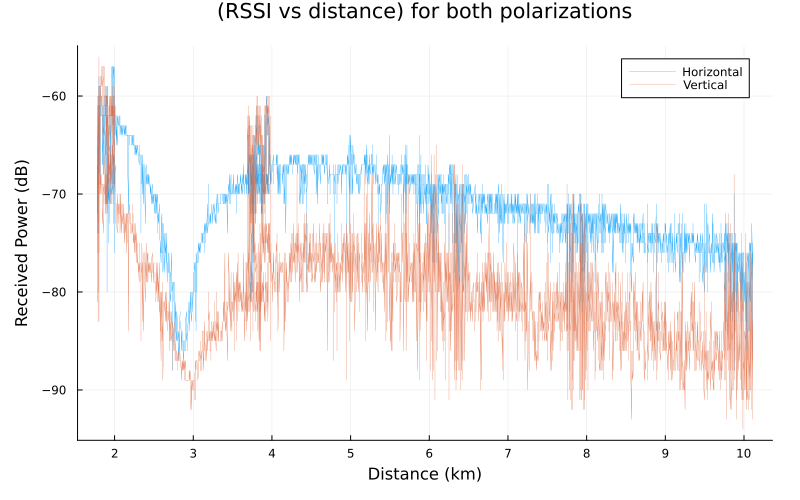

In [13]:
plt = plot( d₁, rₛₛₛᵢ¹, label = "Horizontal", linewidth = .3)
plt = plot!(d₂, rₛₛₛᵢ², label = "Vertical", linewidth = .3)
plot(plt
    , xlabel="Distance (km)", ylabel="Received Power (dB)"
    , title="(RSSI vs distance) for both polarizations"
    , size = (800,500)
    , legend = :topright
    , xticks = 0:1:20
    , grid = :true
    , margin = 5mm
)

&#x1F518; Try to explain where the difference between the two polarizations comes from!

When analysing polarization for wireless broadband communications between boats on the sea, it may be crucial to consider the typical sea conditions and the specific operational requirements. While vertical polarization seems to be common, its effectiveness may be compromised by large, rough sea waves. We can observe a 10dB difference between the two polarizations and the vertical seems to be unstable.

&#x1F518; 3. Take the two-path model without the large distance approximation (Equation (4.55) from the Appendix), and compute the received signal strength according to $P_{Rx}(d) = |E_{tot}(d)|^2A_e$, where $A_e$ is the receive antenna aperture, which is related to the receive antenna gain by $G_{R_x} = \frac{4 \pi}{\lambda ^2}A_e$ . Further use $|E(d)|^2 = \frac{P_{Tx}G_{Tx}}{4\pi d^2}$ to compute the power density at $1m$. Implement this as a function in Matlab.

The magnitude of the field strength can thus be written as

$$|E_{tot}(d)| = E(1m) \frac{1}{d|m} \sqrt{(1 − \cos(\Delta \phi))^2 + \sin^2(\Delta \phi)  }$$

In [14]:
# In the Javelin – Radio Link System DataSheet
# System Highlights
# Up to 23 dBm aggregated TX-power for long range capability
Gₜₓ = 23; # dBi
Gᵣₓ = 12; # Model ANT4958Q12VH  Gain 2x12dBi
Pₜₓ = 23; # Up to 23 dBm aggregated TX-power for long range capability 

In [15]:
# In linear Values
Gₜₓₗᵢₙ   = 10^(Gₜₓ/10)
Gᵣₓₗᵢₙ  = 10^(Gᵣₓ/10)
Pₜₓₗᵢₙ  = 10^(Pₜₓ/10);

In [16]:
f₍ = 5.6e9 # Carrier Frequency in Hz
C = 3e8; # In m/s

The formula $\lambda = C / f$ represents the fundamental relationship between the wavelength $\lambda$ of a radio wave, the speed of light $C$, and the frequency $f$ of the wave. 
   Then the wavelength calculation would be:
   $
   \lambda = \frac{C}{f} = \frac{3 \times 10^8 \text{ m/s}}{5.6 \text{ GHz}}
   $


In [17]:
λ = C / f₍*1e-3; @show λ; # in Km

λ = 5.357142857142857e-5


Receiver Antenna:
$A_e = \frac{G_{R_x} \lambda ^2}{4 \pi}{}$

In [18]:
Aₑ = Gᵣₓₗᵢₙ * λ^2 / 4π; @show Aₑ;

Aₑ = 3.6195667612817716e-9


In [19]:
Eᵨ = √(( Pₜₓₗᵢₙ  * Gₜₓₗᵢₙ )/4π); @show Eᵨ;

Eᵨ = 56.285310727541194


$\Delta\phi = 2\frac{h_{TX} h_{RX}}{d} \frac{2 \pi f_c}{c_0}$

In [20]:
Hₜₓ = 25 # In meter
Hᵣₓ = 3; # In meter

In [21]:
# For computing linear Values
Hₜₓₗᵢₙ   = Hₜₓ*1e-3 # In millimeter
Hᵣₓₗᵢₙ  = Hᵣₓ*1e-3; # In millimeter

In [22]:
# Initialize E_tot
Eₜₒₜ = zeros(length(d₁))

# Compute E_tot for each distance
for (i, d) in enumerate(d₁)
    Δϕ = 2 * (Hₜₓₗᵢₙ * Hᵣₓₗᵢₙ / d) * (2π / λ)
    Eₜₒₜ[i] = (Eᵨ / d) * √((1 - cos(Δϕ))^2 + (sin(Δϕ))^2)
end

In [23]:
Pᵣₓ = 10 * log10.(Eₜₒₜ.^2 * Aₑ); # received power in dB

&#x1F518; 4. Plot the received power based on the previous function on top of the measurement data. 

In [24]:
using LaTeXStrings

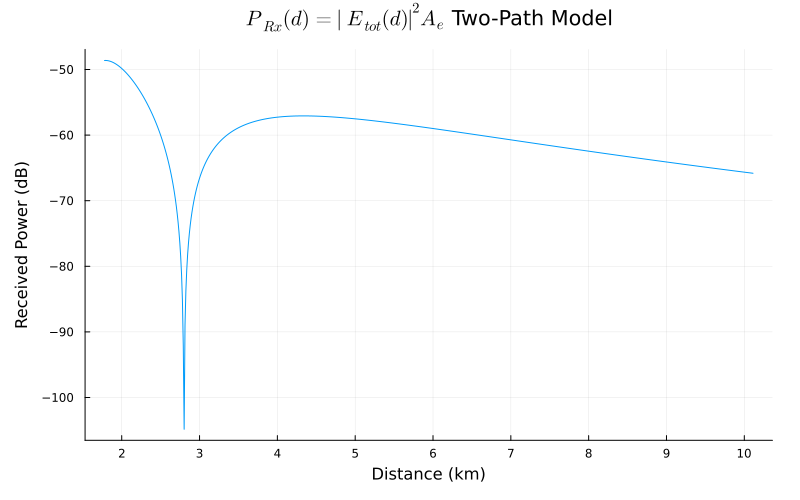

In [25]:
# Signal Strength vs. Distance on a log scale
p1 = plot(d₁, Pᵣₓ
    # , xaxis=:log
    , xlabel="Distance (km)", ylabel="Received Power (dB)"
    , title=L"P_{Rx}(d) = |E_{tot}(d)|^2A_e " * " Two-Path Model"
    , size = (800,500)
    , legend=:false
    , xticks = 1:1:10
    , margin = 5mm
)
plot(p1)

&#x1F518; Does the model fit the data? Try to explain why or why not!

With the V shape design, then decaying when distance increases, the two-path model follows the same figure as the two polarization plot, albeit higher in height (between -110dB and -50dB).
The height may be due to the model's nature of not being affected by white noise.

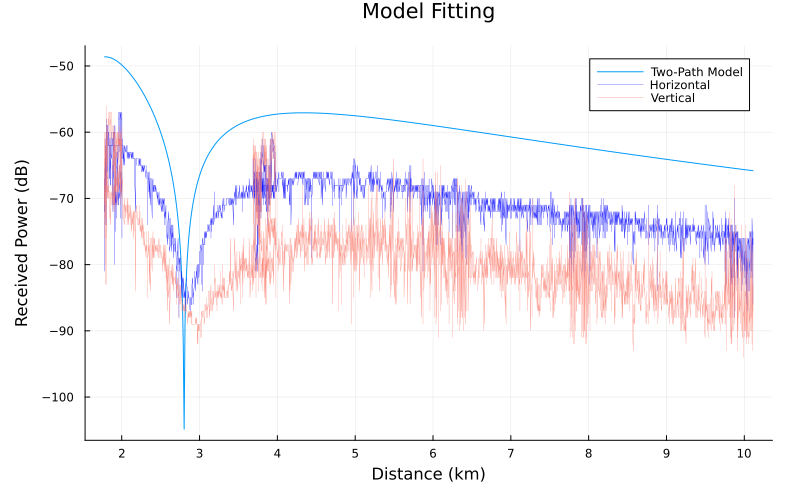

In [26]:
p2 = plot(d₁, Pᵣₓ
    # , xaxis=:log
    , xlabel="Distance (km)", ylabel="Received Power (dB)"
    , label = "Two-Path Model"
    , legend=false
)
p2 = plot!( d₁, rₛₛₛᵢ¹, label = "Horizontal", linewidth = .3, color=:blue)
p2 = plot!(d₂, rₛₛₛᵢ², label = "Vertical", linewidth = .3, color=:salmon)
plot(p2
    , xlabel="Distance (km)", ylabel="Received Power (dB)"
    , title="Model Fitting"
    , size = (800,500)
    , xticks = 1:1:10
    , legend = :topright
    , grid = :true
    , margin = 5mm
)

&#x1F518; 5. Using the path loss approximation for large distances (4.59) from the Appendix, and assuming a fading margin of M = 10 dB, determine the maximum range of one cell for the lowest and the highest MCS.

$P_{RX}(d) \approx P_{TX} G_{TX} G_{RX} \big( \frac{h_{TX} h_{RX}}{ d^2} \big)^2 \qquad (4.59) $ 

In [27]:
using Printf

In [28]:
M = 10; @show M; # dB Fading Margin
Rₓₛₘᵢₙ, Rₓₛₘₐₓ  = -97, -74; @show Rₓₛₘᵢₙ, Rₓₛₘₐₓ; # RX Sensitivity MCS Min and Max 

M = 10
(Rₓₛₘᵢₙ, Rₓₛₘₐₓ) = (-97, -74)


#### Calculate Distance

$
d_{\text{(dB)}} = P_{\text{Tx(dB)}} + G_{\text{Tx(dB)}} + G_{\text{Rx(dB)}} - ( P_{\text{Rx-sensi-range(dB)}} + M )
$

$
pl_{\text{factor}} =  20 \log_{10}(h_{\text{Tx}} \times h_{\text{Rx}}) 
$

Solve $d$

In [29]:
# Function to calculate maximum communication range based on provided parameters
function calculate_distance(Pᵣₓₛₑₙₛᵢ)

    # Re-arrange the path loss formula to solve for d
    path_loss = Pₜₓ + Gₜₓ + Gᵣₓ - (Pᵣₓₛₑₙₛᵢ + M)
    
    # Convert path loss to distance
    pl_factor = 20 * log10(Hₜₓ * Hᵣₓ) # Frequency factor
    
    # Converting from dB to a linear scale using the factor 40 as the denominator in the exponent
    d = 10^((path_loss + pl_factor) / 40) # Solving for d
    
    # Return the calculated maximum distance in km
    return d / 1000  
end

calculate_distance (generic function with 1 method)

In [30]:
# Calculate distances for the lowest and highest MCS sensitivities
d_max_lowest = calculate_distance(Rₓₛₘᵢₙ)  # Lowest MCS sensitivity
d_max_highest = calculate_distance(Rₓₛₘₐₓ)  # Highest MCS sensitivity

println("Maximum range for the lowest MCS: $(@sprintf("%.2f", d_max_lowest)) km")
println("Maximum range for the highest MCS: $(@sprintf("%.2f", d_max_highest)) km")


Maximum range for the lowest MCS: 36.52 km
Maximum range for the highest MCS: 9.72 km
